In [1]:
library(ape)
library(jsonlite)
suppressPackageStartupMessages(library(ggtree))

dataDir <- "Data"
genomeTreeDir <- "Genome_tree"

Warning message:
"package 'jsonlite' was built under R version 3.6.2"


In [2]:
tree <- read.tree(file.path(genomeTreeDir, "RAxML_bestTree.GTRGAMMA"))

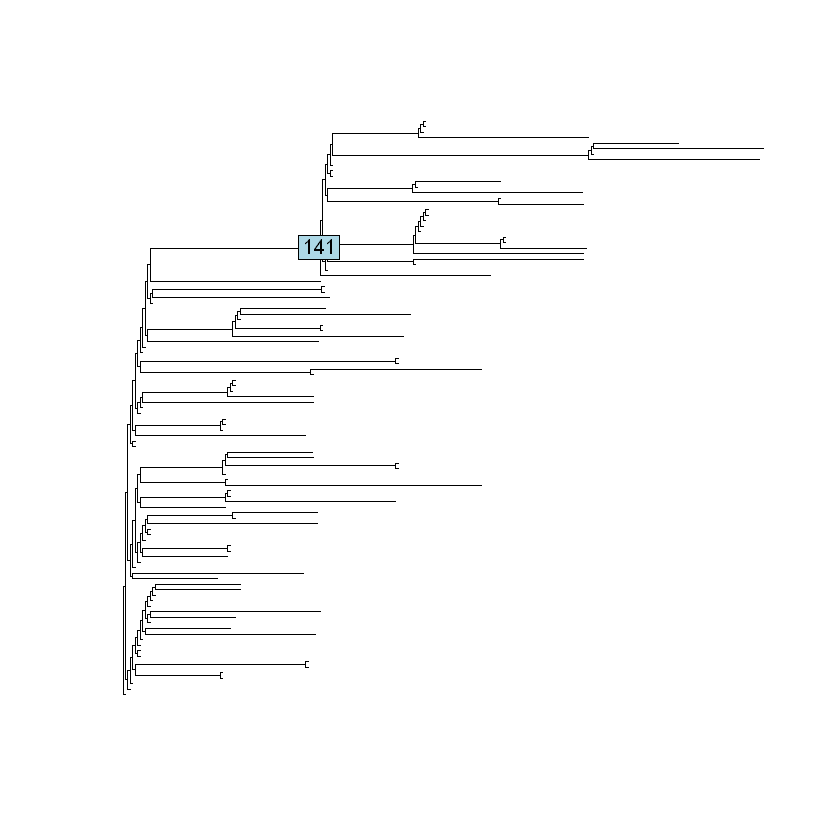

In [3]:
plot(ladderize(tree, FALSE), show.tip.label = FALSE)
nodelabels(node=141)

In [4]:
genotypes <- list()

genotypes[["gp1"]] <- extract.clade(tree, 141)$tip.label

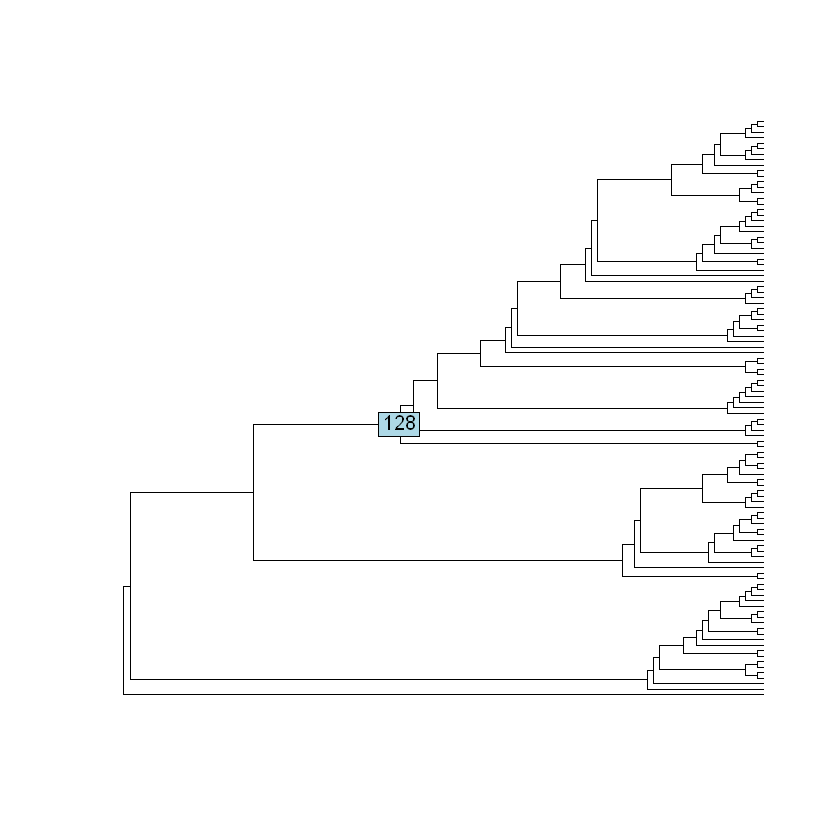

In [5]:
plot(ladderize(tree, FALSE), use.edge.length = FALSE, show.tip.label = FALSE)
nodelabels(node=128)

In [6]:
genotypes[["gp2"]] <- setdiff(
    extract.clade(tree, 128)$tip.label,
    genotypes[["gp1"]]
)

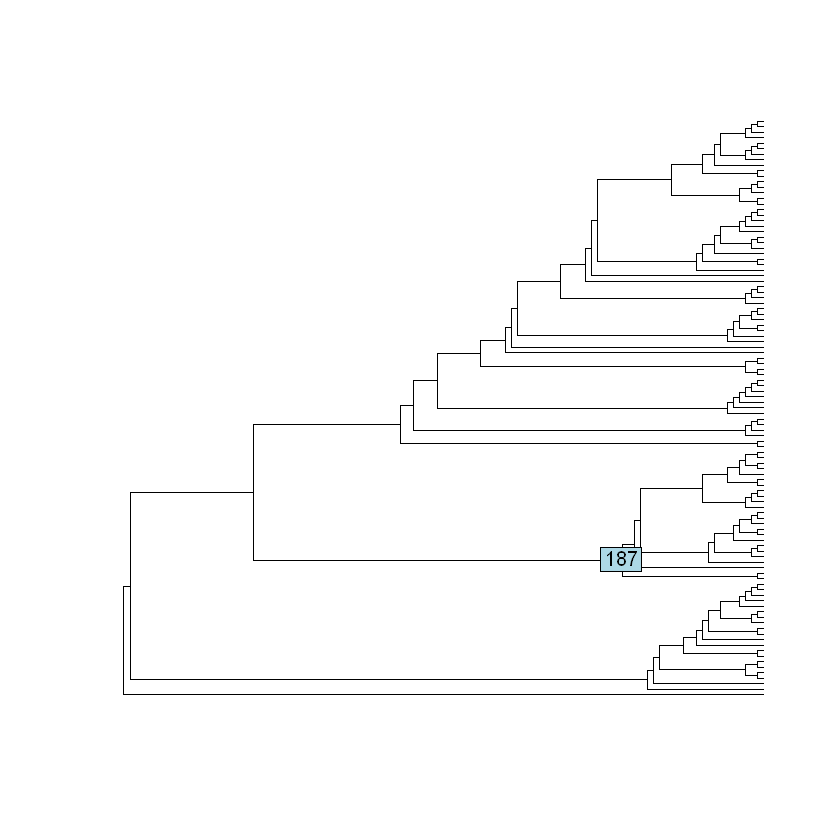

In [7]:
plot(ladderize(tree, FALSE), use.edge.length = FALSE, show.tip.label = FALSE)
nodelabels(node = 187)

In [8]:
genotypes[["gp3"]] <- extract.clade(tree, 187)$tip.label

In [9]:
genotypes[["gp4"]] <- setdiff(tree$tip.label, unlist(genotypes))

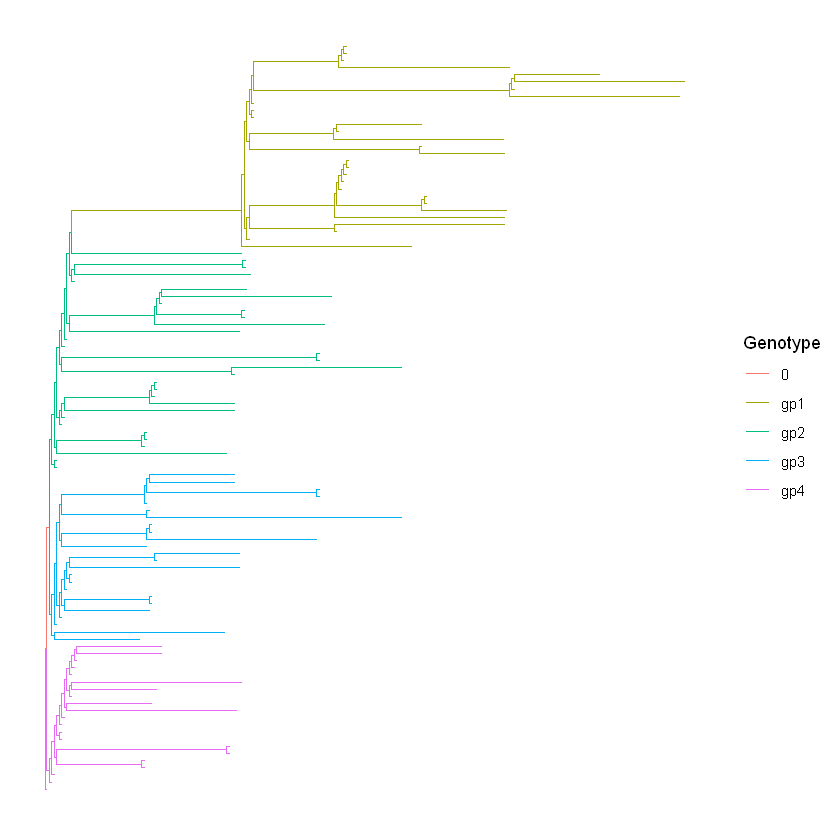

In [10]:
ggtree(groupOTU(tree, genotypes, "Genotype")) + aes(color=Genotype)

In [11]:
write_json(x = genotypes, path = file.path(dataDir, "genotypes.json"))